In [1]:
import pandas as pd
import numpy as np
import os
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta, date
import operator

from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

C:\Users\Kohei\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/02_data/02_19a/'
path = 'C:/Users/Kohei/Documents/Kaggle/Recruit/04_lgb/04_19ag/'
ver = '04_19ag_lgb'

In [3]:
ID = ['air_store_id','visit_date','flag']
TARGET='visitors'

In [4]:
def RMSLE(y, pred):
    return mean_squared_error(y, pred) ** 0.5

In [5]:
train = pd.read_csv(os.path.join(data_path, 'train2.csv'))

In [6]:
# Variable Selection
cols2 = ['holiday_flg',\
         'holiday_flg+1d',\
         'holiday_flg-1d',\
#          'holiday_flg_rev',\
#         'dow',\
#          'month',\
        'dow_0',\
        'dow_1','dow_2','dow_3','dow_4','dow_5','dow_6',\
        'month_1',\
        'month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',\
        'air_genre',\
        'latitude','longitude',\
#         'var_max_lat','var_max_long',\
#             'km_latlong',\
#         'air_areaL1_lbl',\
        'air_areaL2_lbl',\
#         'air_areaL3_lbl',\
        'km_latlong_0',\
        'km_latlong_1','km_latlong_2','km_latlong_3','km_latlong_4','km_latlong_5',\
        'km_latlong_6','km_latlong_7','km_latlong_8','km_latlong_9','km_latlong_10','km_latlong_11',\
#         'air_genre_0','air_genre_1','air_genre_2','air_genre_3','air_genre_4','air_genre_5','air_genre_6','air_genre_7',\
#         'air_genre_8','air_genre_9','air_genre_10','air_genre_11','air_genre_12','air_genre_13',\
#             'km_hpg_latlong',\
#         'days_from_first_date',\
        'dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
#         'dow_all_cnt',\
        'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
        'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
        'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
#         'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
#         'dowhol_all_cnt',\
#             'dowhol+1d_all_cnt',\
#             'dowhol-1d_all_cnt',\
#     'dowhol_rev_all_cnt',\
#             'km_latlong_mean','km_latlong_dow_mean',\
        'genre_mean',\
#          'genre_dow_mean',\
        'areaL1_mean',\
#         'areaL1_dow_mean',\
        'areaL2_mean',\
#         'areaL2_dow_mean',\
        'areaL3_mean',\
#         'areaL3_dow_mean',\
        'res_ttl',\
#         'res_cnt',\
        'res_mean',\
#         'res_hr_std',\
#         'res_std',\
        'res_hr_dif_sum',\
#         'res_hr_dif_mean',\
        'res_ttl_dow_mean','res_cnt_dow_mean',\
#         'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d',\
        'lag_10d','lag_15d','lag_20d','lag_25d','lag_30d','lag_35d','lag_40d','lag_45d','lag_50d',\
         
        'lag_res_1d','lag_res_2d','lag_res_3d','lag_res_4d','lag_res_5d','lag_res_6d',\
#         'lag_res_10d','lag_res_15d','lag_res_20d',\
        'lag_res_25d','lag_res_30d','lag_res_35d','lag_res_40d','lag_res_45d','lag_res_50d',\
        'lag_1w',\
#         'lag_2w',\
        'lag_3w',\
#         'lag_4w',\
        'lag_5w',\
#         'lag_6w',\
        'lag_7w',\
#         'lag_8w',\
        'lag_9w',\
#         'lag_10w',\
        'lag_11w',\
#         'lag_12w',\
        'lag_13w',\
#         'lag_14w',\
        'lag_15w',\
#         'lag_16w',\
        'lag_17w',\
#         'lag_18w',\
        'lag_19w',\
#         'lag_20w',\
#         'lag_res_1w',\
        'lag_res_2w',\
#         'lag_res_3w',\
        'lag_res_4w',\
#         'lag_res_5w',\
        'lag_res_6w',\
#         'lag_res_7w',\
        'lag_res_8w',\
#         'lag_res_9w',\
        'lag_res_10w',\
#         'lag_res_11w',\
        'lag_res_12w',\
#         'lag_res_13w',\
        'lag_res_14w',\
#         'lag_res_15w',\
        'lag_res_16w',\
#         'lag_res_17w',\
        'lag_res_18w',\
#         'lag_res_19w',\
        'lag_res_20w',\
        'mean_3d','max_3d','min_3d','std_3d',\
        'mean_7d','max_7d','min_7d','std_7d',\
#         'mean_14d','max_14d','min_14d','std_14d',\
#         'mean_21d','max_21d','min_21d','std_21d',\
        'mean_28d','max_28d','min_28d','std_28d',\
#         'mean_35d','max_35d','min_35d','std_35d',\
#         'mean_42d','max_42d','min_42d','std_42d',\
        'mean_49d','max_49d','min_49d','std_49d',\
#         'mean_56d','max_56d','min_56d','std_56d',\
#         'mean_63d','max_63d','min_63d','std_63d',\
        'mean_70d','max_70d','min_70d','std_70d',\
#         'mean_77d','max_77d','min_77d','std_77d',\
#         'mean_84d','max_84d','min_84d','std_84d',\
#             'scale_to_maxmin_3d','scale_to_std_3d',\
        'scale_to_maxmin_7d','scale_to_std_7d',\
#         'scale_to_maxmin_14d','scale_to_std_14d',\
        'scale_to_maxmin_21d','scale_to_std_21d',\
#         'scale_to_maxmin_28d','scale_to_std_28d',\
        'scale_to_maxmin_35d','scale_to_std_35d',\
#             'scale_to_maxmin_42d','scale_to_std_42d',\
        'scale_to_maxmin_49d','scale_to_std_49d',\
#         'scale_to_maxmin_56d','scale_to_std_56d',\
        'scale_to_maxmin_63d','scale_to_std_63d',\
#             'scale_to_maxmin_70d','scale_to_std_70d',\
        'scale_to_maxmin_77d','scale_to_std_77d',\
#         'scale_to_maxmin_84d','scale_to_std_84d',\
#             'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
#             'mean_28d-56d','mean_28d-84d','mean_56d-84d',\
#         'mean_dow_2w','max_dow_2w','min_dow_2w','std_dow_2w',\
        'mean_dow_3w','max_dow_3w','min_dow_3w','std_dow_3w',\
#         'mean_dow_4w','max_dow_4w','min_dow_4w','std_dow_4w',\
        'mean_dow_5w','max_dow_5w','min_dow_5w','std_dow_5w',\
#         'mean_dow_6w','max_dow_6w','min_dow_6w','std_dow_6w',\
        'mean_dow_7w','max_dow_7w','min_dow_7w','std_dow_7w',\
#         'mean_dow_8w','max_dow_8w','min_dow_8w','std_dow_8w',\
        'mean_dow_9w','max_dow_9w','min_dow_9w','std_dow_9w',\
#         'mean_dow_10w','max_dow_10w','min_dow_10w','std_dow_10w',\
#             'mean_dow_2w-4w','mean_dow_2w-6w','mean_dow_2w-8w','mean_dow_2w-10w',\
#         'mean_dow_4w-6w','mean_dow_4w-8w','mean_dow_4w-10w',\
#         'mean_dow_6w-8w','mean_dow_6w-10w','mean_dow_8w-10w',\
        'rainfall',\
#         'snowfall',\
        'wind_max',\
        'weather_daytime',\
        'weather_nighttime',\
#             'weather_daytime2','weather_nighttime2',\
        'weather_daytime_0',\
        'weather_daytime_1',\
#         'weather_daytime_2',\
        'weather_daytime_3',\
        'weather_nighttime_0',\
        'weather_nighttime_1',\
        'weather_nighttime_2',\
        'weather_nighttime_3',\
#         'wind_max_inst',\
        'rainfall_max1h',\
        'wind_avg',\
        'temperature_high','temperature_low','temperature_avg',\
#         'snowfall_max',\
        'humidity_avg',\
        'daylight_hr'
#         'na_cnt'
        ]
# add = [c for c in train.columns if "air_areaL1_lbl_" in c]
# cols2.extend(add)
# add = [c for c in train.columns if "air_areaL2_lbl_" in c]
# cols2.extend(add)
add = [c for c in train.columns if "air_areaL3_lbl_" in c]
cols2.extend(add)

cols1 = cols2.copy()
lag = ['lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols1.extend(lag)

In [7]:
cols_adj = ['dow_all_wmean','dow_all_max','dow_all_min','dow_all_med',\
            'dowhol_all_wmean','dowhol_all_max','dowhol_all_min','dowhol_all_med',\
            'dowhol+1d_all_wmean','dowhol+1d_all_max','dowhol+1d_all_min','dowhol+1d_all_med',\
            'dowhol-1d_all_wmean','dowhol-1d_all_max','dowhol-1d_all_min','dowhol-1d_all_med',\
            'dowhol_rev_all_wmean','dowhol_rev_all_max','dowhol_rev_all_min','dowhol_rev_all_med',\
            'km_latlong_mean','km_latlong_dow_mean',\
            'genre_mean','genre_dow_mean',\
            'areaL1_mean','areaL1_dow_mean',\
            'areaL2_mean','areaL2_dow_mean',\
            'areaL3_mean','areaL3_dow_mean',\
            'mean_3d','max_3d','min_3d','std_3d','scale_to_maxmin_3d','scale_to_std_3d',\
            'mean_7d','max_7d','min_7d','std_7d','scale_to_maxmin_7d','scale_to_std_7d',\
            'mean_14d','max_14d','min_14d','std_14d','scale_to_maxmin_14d','scale_to_std_14d',\
            'mean_21d','max_21d','min_21d','std_21d','scale_to_maxmin_21d','scale_to_std_21d',\
            'mean_28d','max_28d','min_28d','std_28d','scale_to_maxmin_28d','scale_to_std_28d',\
            'mean_35d','max_35d','min_35d','std_35d','scale_to_maxmin_35d','scale_to_std_35d',\
            'mean_42d','max_42d','min_42d','std_42d','scale_to_maxmin_42d','scale_to_std_42d',\
            'mean_49d','max_49d','min_49d','std_49d','scale_to_maxmin_49d','scale_to_std_49d',\
            'mean_56d','max_56d','min_56d','std_56d','scale_to_maxmin_56d','scale_to_std_56d',\
            'mean_63d','max_63d','min_63d','std_63d','scale_to_maxmin_63d','scale_to_std_63d',\
            'mean_70d','max_70d','min_70d','std_70d','scale_to_maxmin_70d','scale_to_std_70d',\
            'mean_77d','max_77d','min_77d','std_77d','scale_to_maxmin_77d','scale_to_std_77d',\
            'mean_84d','max_84d','min_84d','std_84d','scale_to_maxmin_84d','scale_to_std_84d',\
            'mean_7d-14d','mean_7d-28d','mean_7d-56d','mean_7d-84d','mean_14d-28d','mean_14d-56d','mean_14d-84d',\
            'mean_28d-56d','mean_28d-84d','mean_56d-84d']
cols_remove = ['dow_all_cnt','dowhol_all_cnt','dowhol+1d_all_cnt','dowhol-1d_all_cnt','dowhol_rev_all_cnt',
               'lag_1d','lag_2d','lag_3d','lag_4d','lag_5d','lag_6d']
cols_inf = ['scale_to_maxmin_3d','scale_to_std_3d',\
            'scale_to_maxmin_7d','scale_to_std_7d',\
            'scale_to_maxmin_14d','scale_to_std_14d',\
            'scale_to_maxmin_21d','scale_to_std_21d',\
            'scale_to_maxmin_28d','scale_to_std_28d',\
            'scale_to_maxmin_35d','scale_to_std_35d',\
            'scale_to_maxmin_42d','scale_to_std_42d',\
            'scale_to_maxmin_49d','scale_to_std_49d',\
            'scale_to_maxmin_56d','scale_to_std_56d',\
            'scale_to_maxmin_63d','scale_to_std_63d',\
            'scale_to_maxmin_70d','scale_to_std_70d',\
            'scale_to_maxmin_77d','scale_to_std_77d',\
            'scale_to_maxmin_84d','scale_to_std_84d']

In [28]:
def model_run(df):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
#     train['visit_date'] = pd.to_datetime(train['visit_date'])
#     time_index = np.where((train.visit_date<(date(2016,12,23))) | (train.visit_date>(date(2017,1,15))))
#     train = train.loc[time_index].reset_index()
    
    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    y_train = np.log1p(train['visitors'])
    id_train = train[ID]
    id_test  = test[ID]
    x_train = train
    x_test = test
    x_train.drop(ID, axis=1, inplace=True)
    x_train.drop(TARGET, axis=1, inplace=True)
    x_test.drop(ID, axis=1, inplace=True)
    del train, test
    
    tr_te = pd.concat([x_train,x_test])
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,tr_te[x].median())
        tr_te[x] = tr_te[x].replace(np.inf,tr_te[x].median())
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
        
    ntrain = x_train.shape[0]
    x_train = tr_te[:ntrain]
    x_test  = tr_te[ntrain:]

    if df=='train1':
        x_train = x_train[cols1]
        x_test = x_test[cols1]
    elif df=='train2':
        x_train = x_train[cols2]
        x_test = x_test[cols2]
        
#     x_train['areaL3_mean_x_genre_mean'] = x_train['areaL3_mean']*x_train['genre_mean'] 
#     x_test['areaL3_mean_x_genre_mean']  = x_test['areaL3_mean']*x_test['genre_mean'] 
    
    x_train['wind_max_x_rainfall'] = x_train['wind_max']*x_train['rainfall'] 
    x_test['wind_max_x_rainfall']  = x_test['wind_max']*x_test['rainfall']
    
    n_folds = 5
    cv_sum = 0
    pred_tr = []
    pred_te = []

    kf = KFold(x_train.shape[0], n_folds=n_folds, random_state=1234, shuffle=True)

    num_boost_round=80000
    early_stopping_rounds=100
    verbose_eval=1000
    params = {
            'task' : 'train',
            'boosting_type' : 'gbdt',
            'objective' : 'regression',
            'metric' : 'rmse',
            'learning_rate' : 0.005,
            'num_leaves' : 40,
#             'max_depth': 10,
            'min_data_in_leaf': 5,
            'bagging_fraction' : 0.9,
            'feature_fraction' : 0.8,
            'bagging_freq': 5,
            'verbose' : 1
    }

    for i, (tr_index,vl_index) in enumerate(kf):
        print('\n Fold %d' % (i+1))
        pred = []
        pred_vl = []
        
        x_tr, x_vl = x_train.loc[tr_index].copy(), x_train.loc[vl_index].copy()
        y_tr, y_vl = y_train[tr_index], y_train[vl_index]
        id_vl = id_train.loc[vl_index].copy()
        
        d_train = lgb.Dataset(x_tr, y_tr)
        d_valid = lgb.Dataset(x_vl, y_vl)
        watchlist = [(d_train,'train'),(d_valid,'valid')]

        clf = lgb.train(params,
                        d_train,
                        num_boost_round=num_boost_round,
                        valid_sets=d_valid,
                        early_stopping_rounds=early_stopping_rounds,
                        verbose_eval=verbose_eval)

        pred = clf.predict(x_vl)

        cv_score = RMSLE(y_vl, pred)
        print('RMSLE: %.6f' % cv_score)

        pred_vl = id_vl
        pred_vl['pred'] = pred    
        if i==0:
            pred_tr = pred_vl
        else:
            pred_tr = pd.concat([pred_tr,pred_vl])

        pred = clf.predict(x_test)
        if i==0:
            pred_te = pred
        else:
            pred_te += pred
        cv_sum = cv_sum + cv_score

    pred_te /= n_folds
    pred_te = pd.DataFrame({'pred':pred_te})
    pred_te = pd.concat([id_test,pred_te],axis=1)

    print('CV RMSLE: %.6f' % (cv_sum / n_folds))

    return pred_tr, pred_te

In [29]:
def validation_run(df, split_days, n):
    train = pd.read_csv(os.path.join(data_path, df+'.csv'))
    train['visit_date'] = pd.to_datetime(train['visit_date'])

    begin_date = date(2017,4,23)-timedelta(days=split_days*n)
    end_date   = date(2017,4,23)-timedelta(days=split_days*(n-1))
    print('\nValidation Period: {} - {}'.format(begin_date,end_date-timedelta(days=1)))
    tr_index = np.where(train.visit_date<begin_date)
    vl_index = np.where((train.visit_date>=begin_date) & (train.visit_date<end_date))

    test = pd.read_csv(os.path.join(data_path, 'test_all.csv'))
    if df=='train1':
        test = test.loc[test.flag==1,:].reset_index(drop=True)
    elif df=='train2':
        test = test.loc[test.flag==2,:].reset_index(drop=True)
        
    test[TARGET] = 0
    tr_te = pd.concat([train,test])
    for x in cols_inf:
        tr_te[x] = tr_te[x].replace(-np.inf,tr_te[x].median())
        tr_te[x] = tr_te[x].replace(np.inf,tr_te[x].median())
    for x in cols_adj:
        tr_te[x] = tr_te[x].replace(-1,tr_te[x].median())
        
    ntrain = train.shape[0]
    train = tr_te[:ntrain]
    test  = tr_te[ntrain:]

    tr = train.loc[tr_index].copy()
    vl = train.loc[vl_index].copy()

    y_tr = np.log1p(tr['visitors'])
    y_vl = np.log1p(vl['visitors'])

    x_tr = tr.copy()
    x_tr.drop(ID, axis=1, inplace=True)
    x_tr.drop(TARGET, axis=1, inplace=True)

    x_vl = vl.copy()
    x_vl.drop(ID, axis=1, inplace=True)
    x_vl.drop(TARGET, axis=1, inplace=True)
    del tr, vl

    
    if df=='train1':
        x_tr = x_tr[cols1]
        x_vl = x_vl[cols1]
    elif df=='train2':
        x_tr = x_tr[cols2]
        x_vl = x_vl[cols2]

#     x_tr['areaL3_mean_x_genre_mean'] = x_tr['areaL3_mean']*x_tr['genre_mean'] 
#     x_vl['areaL3_mean_x_genre_mean'] = x_vl['areaL3_mean']*x_vl['genre_mean']
    
    x_tr['wind_max_x_rainfall'] = x_tr['wind_max']*x_tr['rainfall'] 
    x_vl['wind_max_x_rainfall'] = x_vl['wind_max']*x_vl['rainfall'] 

    num_boost_round=80000
    early_stopping_rounds=100
    verbose_eval=1000
    params = {
            'task' : 'train',
            'boosting_type' : 'gbdt',
            'objective' : 'regression',
            'metric' : 'rmse',
            'learning_rate' : 0.005,
            'num_leaves' : 40,
#             'max_depth': 10,
            'min_data_in_leaf': 5,
            'bagging_fraction' : 0.9,
            'feature_fraction' : 0.8,
            'bagging_freq': 5,
            'verbose' : 1
    }

    d_train = lgb.Dataset(x_tr, y_tr)
    d_valid = lgb.Dataset(x_vl, y_vl)
    watchlist = [(d_train,'train'),(d_valid,'valid')]

    clf = lgb.train(params,
                    d_train,
                    num_boost_round=num_boost_round,
                    valid_sets=d_valid,
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=verbose_eval)

    pred = clf.predict(x_vl)

    cv_score = RMSLE(y_vl, pred)
    print('\nRMSLE: %.6f' % cv_score)
    
    return cv_score

In [30]:
### Train2 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train2', 33, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-03-21 - 2017-04-22
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.518835
[2000]	valid_0's rmse: 0.515354
[3000]	valid_0's rmse: 0.513881
[4000]	valid_0's rmse: 0.513264
[5000]	valid_0's rmse: 0.512767
Early stopping, best iteration is:
[4935]	valid_0's rmse: 0.512746

RMSLE: 0.512746

Validation Period: 2017-02-16 - 2017-03-20
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.513834
Early stopping, best iteration is:
[1579]	valid_0's rmse: 0.51221

RMSLE: 0.512210

Validation Period: 2017-01-14 - 2017-02-15
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.517372
Early stopping, best iteration is:
[1078]	valid_0's rmse: 0.51719

RMSLE: 0.517190

Validation Period: 2016-12-12 - 2017-01-13
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.572181
[2000]	valid_0's rmse: 0.567193
Early stopping, best iteration is:

In [31]:
### Train1 - Validation
cv_sum = 0
for n in range(1,5+1):
    cv_score = validation_run('train1', 6, n)
    cv_sum = cv_sum + cv_score
print('\nRMSLE: %.6f' % (cv_sum/5))


Validation Period: 2017-04-17 - 2017-04-22
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.471028
[2000]	valid_0's rmse: 0.46802
Early stopping, best iteration is:
[2454]	valid_0's rmse: 0.467674

RMSLE: 0.467674

Validation Period: 2017-04-11 - 2017-04-16
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.476476
[2000]	valid_0's rmse: 0.47201
[3000]	valid_0's rmse: 0.470985
[4000]	valid_0's rmse: 0.470239
[5000]	valid_0's rmse: 0.469652
Early stopping, best iteration is:
[5324]	valid_0's rmse: 0.469555

RMSLE: 0.469555

Validation Period: 2017-04-05 - 2017-04-10
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.501039
[2000]	valid_0's rmse: 0.496082
[3000]	valid_0's rmse: 0.494673
Early stopping, best iteration is:
[3547]	valid_0's rmse: 0.494183

RMSLE: 0.494183

Validation Period: 2017-03-30 - 2017-04-04
Training until validation scores don't improve for 100 rounds.
[1

In [32]:
### Train2 - Run
pred_tr2, pred_te2 = model_run('train2')
pred_tr2.to_csv(path+'/'+ver+'_pred_tr2.csv', index=False)
pred_te2.to_csv(path+'/'+ver+'_pred_te2.csv', index=False)


 Fold 1
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.531025
[2000]	valid_0's rmse: 0.525594
[3000]	valid_0's rmse: 0.523308
[4000]	valid_0's rmse: 0.521479
[5000]	valid_0's rmse: 0.520069
[6000]	valid_0's rmse: 0.519056
[7000]	valid_0's rmse: 0.518119
[8000]	valid_0's rmse: 0.517385
[9000]	valid_0's rmse: 0.516704
[10000]	valid_0's rmse: 0.516086
[11000]	valid_0's rmse: 0.515616
[12000]	valid_0's rmse: 0.515182
[13000]	valid_0's rmse: 0.514778
[14000]	valid_0's rmse: 0.514418
[15000]	valid_0's rmse: 0.514096
[16000]	valid_0's rmse: 0.513801
[17000]	valid_0's rmse: 0.513594
[18000]	valid_0's rmse: 0.513431
[19000]	valid_0's rmse: 0.513287
[20000]	valid_0's rmse: 0.513082
[21000]	valid_0's rmse: 0.512898
Early stopping, best iteration is:
[21825]	valid_0's rmse: 0.512769
RMSLE: 0.512769

 Fold 2
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.531463
[2000]	valid_0's rmse: 0.525637
[3000]	valid_0's rmse: 0

In [33]:
### Train1 - Run
pred_tr1, pred_te1 = model_run('train1')
pred_tr1.to_csv(path+'/'+ver+'_pred_tr1.csv', index=False)
pred_te1.to_csv(path+'/'+ver+'_pred_te1.csv', index=False)


 Fold 1
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.507324
[2000]	valid_0's rmse: 0.503475
[3000]	valid_0's rmse: 0.502248
[4000]	valid_0's rmse: 0.50147
[5000]	valid_0's rmse: 0.500967
[6000]	valid_0's rmse: 0.500505
[7000]	valid_0's rmse: 0.50017
[8000]	valid_0's rmse: 0.499844
[9000]	valid_0's rmse: 0.499554
[10000]	valid_0's rmse: 0.499291
[11000]	valid_0's rmse: 0.499092
Early stopping, best iteration is:
[11174]	valid_0's rmse: 0.499066
RMSLE: 0.499066

 Fold 2
Training until validation scores don't improve for 100 rounds.
[1000]	valid_0's rmse: 0.51422
[2000]	valid_0's rmse: 0.510084
[3000]	valid_0's rmse: 0.508746
[4000]	valid_0's rmse: 0.507903
[5000]	valid_0's rmse: 0.507359
[6000]	valid_0's rmse: 0.50693
[7000]	valid_0's rmse: 0.506611
[8000]	valid_0's rmse: 0.506348
[9000]	valid_0's rmse: 0.50609
Early stopping, best iteration is:
[9890]	valid_0's rmse: 0.505853
RMSLE: 0.505853

 Fold 3
Training until validation scores don't impr

In [34]:
sub = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/sample_submission.csv')
sub['air_store_id'] = sub.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sub['visit_date']   = sub.id.map(lambda x: x.split('_')[2])
sub['visit_date'] = pd.to_datetime(sub['visit_date'])

pred_te = pd.concat([pred_te1,pred_te2])
pred_te['visit_date'] = pd.to_datetime(pred_te['visit_date'])

# submission
sub.loc[:,'visitors'] = sub.merge(pred_te, on=['air_store_id','visit_date'], how='left')['pred'].values
sub['visitors'] = np.expm1(sub['visitors'])
sub_file = path+'/'+ver+'_sub.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

# adjusted subumission
sub['pred'] = sub['visitors']
sub.loc[sub.visit_date==date(2017,4,25),'visitors']*=1.10 # Tuesday-judgmental

sub.loc[sub.visit_date==date(2017,4,27),'visitors']*=1.10 # Thursday-judgmental

sub.loc[sub.visit_date==date(2017,4,30),'visitors']*=1.35 # Sunday-judgmental-
sub.loc[sub.visit_date==date(2017,5,1),'visitors'] *=1.20 # Monday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,2),'visitors'] *=1.10 # Tuesday-judgmental-should be high because in-between
sub.loc[sub.visit_date==date(2017,5,3),'visitors'] *=1.10 # Day1
sub.loc[sub.visit_date==date(2017,5,4),'visitors'] *=1.10 # Day2
sub.loc[sub.visit_date==date(2017,5,5),'visitors'] *=1.05 # Day3
sub.loc[sub.visit_date==date(2017,5,6),'visitors'] *=1.00 # Saturday
sub.loc[sub.visit_date==date(2017,5,7),'visitors'] *=0.95 # Sunday
sub.loc[sub.visit_date==date(2017,5,8),'visitors'] *=0.90 # Monday
sub.loc[sub.visit_date==date(2017,5,9),'visitors'] *=0.90 # Tuesday
sub_file = path+'/'+ver+'_sub_adjusted.csv'
sub[['id','visitors']].to_csv(sub_file, index=False)

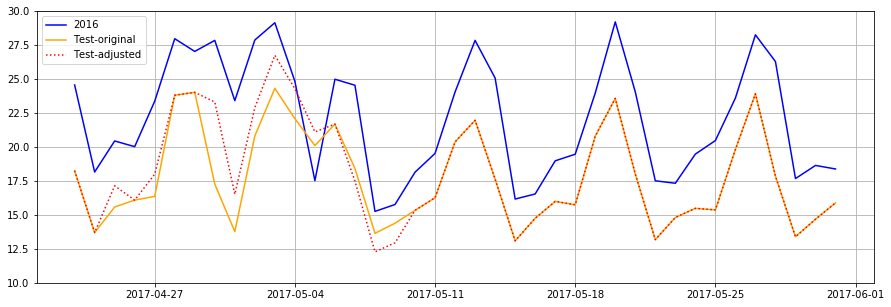

In [35]:
# 2016 Act vs 2017 Pred
pred = pd.DataFrame(sub.groupby(['visit_date'])['pred','visitors'].mean().reset_index()).rename(columns={'visitors':'pred_adj'})

train = pd.read_csv('C:/Users/Kohei/Documents/Kaggle/Recruit/00_input/air_visit_data.csv')[['visit_date','visitors']]
train['visit_date'] = pd.to_datetime(train['visit_date'])
train['visit_date'] = train['visit_date']+timedelta(days=365-1)
df = train[train.visit_date>=date(2017,4,23)]
df = df[df.visit_date<=date(2017,5,31)]
df = pd.DataFrame(df.groupby(['visit_date'])['visitors'].mean().reset_index())

df = df.merge(pred, on='visit_date', how='left')

fig = plt.figure(figsize=(15,5))
plt.plot(df.visit_date, df.visitors, "blue", label = "2016")
plt.plot(df.visit_date, df.pred, "orange", label = "Test-original")
plt.plot(df.visit_date, df.pred_adj, "red", label = "Test-adjusted", linestyle='dotted')
plt.ylim(10,30)
plt.legend(loc='upper left')
plt.grid()